In [2]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [3]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'business.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [4]:
df['is_open'].value_counts(normalize=True)

1    0.82304
0    0.17696
Name: is_open, dtype: float64

In [42]:
df['is_open'].value_counts()

1    109046
0     20222
Name: is_open, dtype: int64

In [5]:
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [6]:
df['state'].value_counts()

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
FL         4
XGM        4
AL         3
CT         3
WA         3
VT         2
NE         2
VA         2
AK         2
GA         2
XWY        2
TN         1
BAS        1
DOW        1
NJ         1
UT         1
AR         1
DUR        1
NM         1
XGL        1
CON        1
BC         1
Name: state, dtype: int64

In [13]:
df['categories'].value_counts()

Coffee & Tea, Food                                                                                                                                                                                                                                                   621
Food, Coffee & Tea                                                                                                                                                                                                                                                   620
Nail Salons, Beauty & Spas                                                                                                                                                                                                                                           614
Restaurants, Pizza                                                                                                                                                                                           

In [8]:
df.shape

(192609, 14)

In [9]:
df = df.dropna()

In [10]:
df.shape

(129268, 14)

In [11]:
df['business_id'].describe()

count                     129268
unique                    129268
top       ZwhspfbcTqPCvZoHmr-ZDA
freq                           1
Name: business_id, dtype: object

In [12]:
len(df[df['categories'].str.contains("Restaurants")])

44100

In [14]:
import seaborn as sns

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


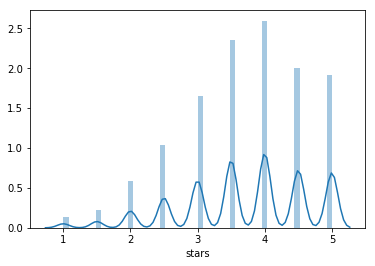

In [15]:
sns.distplot(df['stars'])

In [16]:
df['attributes'].describe()

count                                     129268
unique                                     55052
top       {'BusinessAcceptsCreditCards': 'True'}
freq                                       11224
Name: attributes, dtype: object

In [17]:
df['attributes'].value_counts()

{'BusinessAcceptsCreditCards': 'True'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        11224
{'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True'}                                                 

In [28]:
restaurantprice2 = [d.get('RestaurantsPriceRange2') for d in df['attributes']]

In [31]:
df['pricerange2'] = restaurantprice2

In [34]:
df['pricerange2'].value_counts()

2       49840
1       24905
3        8038
4        1642
None       61
Name: pricerange2, dtype: int64

In [38]:
import pandas_profiling

In [41]:
pandas_profiling.ProfileReport(df)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,17
Number of observations,129268
Total Missing (%),7.9%
Total size in memory,16.8 MiB
Average record size in memory,136.0 B
Numeric,5
Categorical,7
Boolean,1
Date,0
Text (Unique),1
Rejected,1
